In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import ipywidgets as wdg
from IPython.display import display
from matplotlib.gridspec import GridSpec

# Gradenfit

## Beispiel: Ursprungsgrade

In [3]:
x = np.array([0.3, 2., 3., 4., 5])
y = x*1.1 + np.array([0.1, -0.2, -0.15, 0.3, 0.25])

In [4]:
def cost(x, y, a):
    return np.sum((a * x - y)**2)

In [5]:
reg_ugr = LinearRegression(fit_intercept=False).fit(x[:,np.newaxis],y)
x_sol_ugr = np.linspace(0,5,100)
y_sol_ugr = reg_ugr.predict(x_sol_ugr.reshape(-1, 1))
a_range_urg = np.linspace(0.5, 1.5, 100)
err_ugr = np.array([cost(x, y, a) for a in a_range_urg])

In [6]:
fig_ugr = plt.figure(constrained_layout=True, figsize=(9,7))
gs = GridSpec(ncols=3, nrows=1, figure=fig_ugr)
ax_ugr = fig_ugr.add_subplot(gs[0, :2])
ax_ugr_fehler = fig_ugr.add_subplot(gs[0, 2])
fig_ugr.suptitle('Ursprungsgradenfit')
ax_ugr_fehler.scatter(a_range_urg[0], cost(x, y, a_range_urg[0]), marker='x', color='k', label='Fehler')

@wdg.interact(a=wdg.FloatSlider(min=0.5, max=1.5, steps=50, value=0.5, description='Steigung:'),
             loesung=wdg.Checkbox(description='Lösung'))
def plot_line(a, loesung):
    ax_ugr.clear()
    ax_ugr.set_title('Fit')
    ax_ugr_fehler.set_title('Fehler')
    if loesung:
        ax_ugr.plot(x_sol_ugr, y_sol_ugr, linestyle='--', label='$f(x)$')
        ax_ugr_fehler.plot(a_range_urg, err_ugr, color='lightcoral', linestyle='--', label='$J(a)$')
    ax_ugr.scatter(x, y, marker='x', label='Datenpunkt', color='b')
    ax_ugr.plot(x, a*x, linestyle='-', label='$\hat f(x)$', color='k')
    ax_ugr.set_ylim([0,8])
    ax_ugr.set_xlim([0,5.5])
    ax_ugr.set_xlabel('x')
    ax_ugr.set_ylabel('y')
    for i in range(x.shape[0]):
        ax_ugr.vlines(x[i], y[i], a *x[i], color='r', label='Fehler' if i==0 else None, linestyle='--')
    ax_ugr.legend(loc='upper left')
    ax_ugr_fehler.scatter(a, cost(x, y, a), marker='x', color='k')
    ax_ugr_fehler.set_xlim([0.45, 1.55])
    ax_ugr_fehler.set_ylim([-1, 40])
    ax_ugr_fehler.set_xlabel('Steigung')
    ax_ugr_fehler.set_ylabel('Fehler')
    ax_ugr_fehler.legend()
    plt.show()

<IPython.core.display.Javascript object>

interactive(children=(FloatSlider(value=0.5, description='Steigung:', max=1.5, min=0.5), Checkbox(value=False,…

## Graden(under-)fit

In [8]:
y_ord = y + 4
reg_gr = LinearRegression(fit_intercept=False).fit(x[:,np.newaxis],y_ord)
x_sol_gr = np.linspace(0,5,100)
y_sol_gr = reg_gr.predict(x_sol_gr.reshape(-1, 1))
a_range_gr = np.linspace(0.5, 3.5, 20)
err_gr = np.array([cost(x, y_ord, a) for a in a_range_gr])

<IPython.core.display.Javascript object>


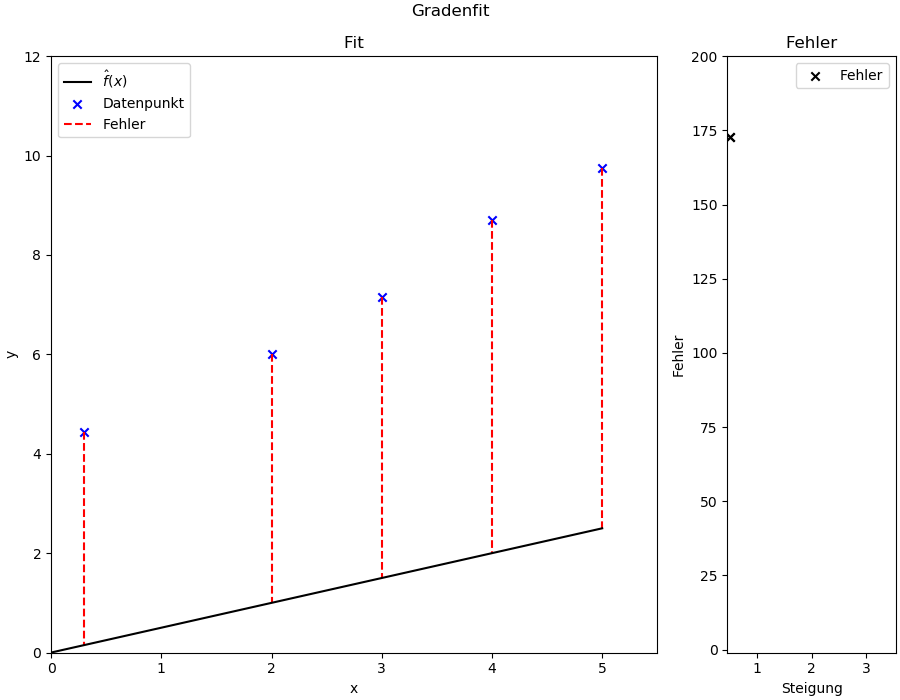

interactive(children=(FloatSlider(value=0.5, description='Steigung:', max=3.5, min=0.5), Checkbox(value=False,…

In [9]:
fig_gr = plt.figure(constrained_layout=True, figsize=(9,7))
gs = GridSpec(ncols=3, nrows=1, figure=fig_gr)
ax_gr = fig_gr.add_subplot(gs[0, :2])
ax_gr_fehler = fig_gr.add_subplot(gs[0, 2])
fig_gr.suptitle('Gradenfit')
ax_gr_fehler.scatter(a_range_gr[0], cost(x, y_ord, a_range_gr[0]), marker='x', color='k', label='Fehler')

@wdg.interact(a=wdg.FloatSlider(min=0.5, max=3.5, steps=50, value=0.5, description='Steigung:'),
             loesung=wdg.Checkbox(description='Lösung'))
def plot_line(a, loesung):
    ax_gr.clear()
    ax_gr.set_title('Fit')
    ax_gr_fehler.set_title('Fehler')
    if loesung:
        ax_gr.plot(x_sol_gr, y_sol_gr, linestyle='--', label='$f(x)$')
        ax_gr_fehler.plot(a_range_gr, err_gr, color='lightcoral', linestyle='--', label='$J(a)$')
    ax_gr.scatter(x, y_ord, marker='x', label='Datenpunkt', color='b')
    ax_gr.plot(x_sol_gr, a*x_sol_gr, linestyle='-', label='$\hat f(x)$', color='k')
    ax_gr.set_ylim([0,12])
    ax_gr.set_xlim([0,5.5])
    ax_gr.set_xlabel('x')
    ax_gr.set_ylabel('y')
    for i in range(x.shape[0]):
        ax_gr.vlines(x[i], y_ord[i], a *x[i], color='r', label='Fehler' if i==0 else None, linestyle='--')
    ax_gr.legend(loc='upper left')
    ax_gr_fehler.scatter(a, cost(x, y_ord, a), marker='x', color='k')
    ax_gr_fehler.set_xlim([0.45, 3.55])
    ax_gr_fehler.set_ylim([-1, 200])
    ax_gr_fehler.set_xlabel('Steigung')
    ax_gr_fehler.set_ylabel('Fehler')
    ax_gr_fehler.legend()
    plt.show()

## Gradenfit (2. Versuch)

In [10]:
def cost_ord(x, y, a, c):
    return np.sum((a * x + c - y)**2)

In [11]:
reg_gr2 = LinearRegression(fit_intercept=True).fit(x[:,np.newaxis],y_ord)
x_sol_gr2 = np.linspace(0,5,100)
y_sol_gr2 = reg_gr2.predict(x_sol_gr2.reshape(-1, 1))
a_min=0.5
a_max=1.5
c_min=2
c_max=6
a_range_gr2 = np.linspace(a_min, a_max, 20)
c_range_gr2 = np.linspace(c_min, c_max, 20)
a_, c_ = np.meshgrid(a_range_gr2, c_range_gr2)
err_gr2 = np.array([[cost_ord(x, y_ord, a, c) for a in a_range_gr2] for c in c_range_gr2])

<IPython.core.display.Javascript object>


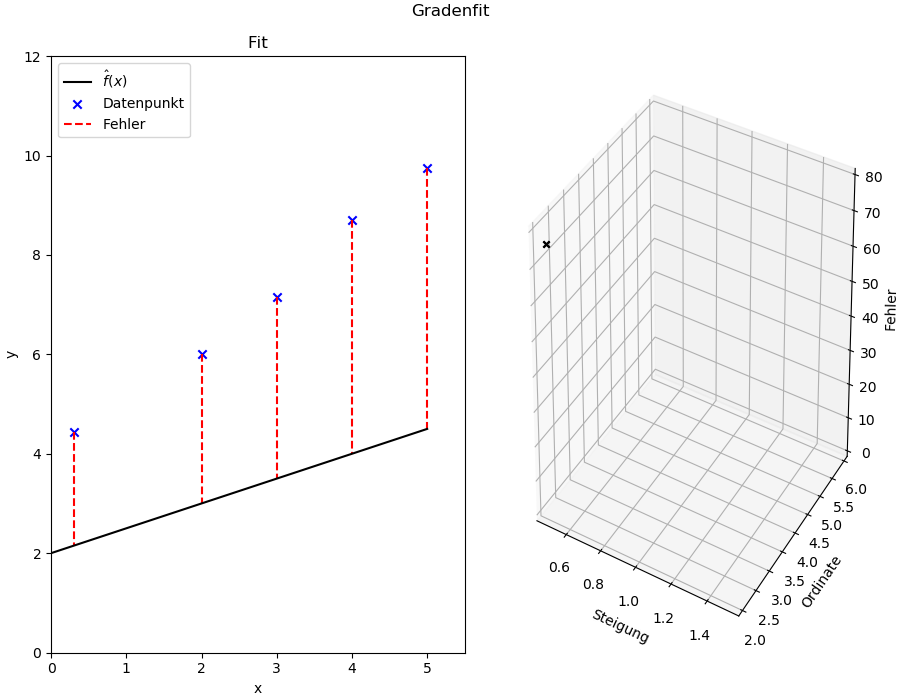

interactive(children=(FloatSlider(value=0.5, description='Steigung:', max=1.5, min=0.5), FloatSlider(value=2.0…

In [12]:
fig_gr2 = plt.figure(constrained_layout=True, figsize=(9,7))
gs = GridSpec(ncols=2, nrows=1, figure=fig_gr2)
ax_gr2 = fig_gr2.add_subplot(gs[0, 0])
ax_gr2_fehler = fig_gr2.add_subplot(gs[0, 1], projection='3d')
fig_gr2.suptitle('Gradenfit')
ax_gr2_fehler.scatter(a_range_gr2[0], c_range_gr2[0], cost_ord(x, y_ord, a_range_gr2[0], c_range_gr2[0]), marker='x', color='k', label='Fehler')

@wdg.interact(a=wdg.FloatSlider(min=a_min, max=a_max, steps=50, value=a_min, description='Steigung:'),
              c=wdg.FloatSlider(min=c_min, max=c_max, steps=50, value=c_min, description='Ordinate:'),
              loesung=wdg.Checkbox(description='Lösung'))
def plot_line(a, c, loesung):
    ax_gr2.clear()
    ax_gr2.set_title('Fit')
    #ax_gr2_fehler.set_title('Fehler')
    if loesung:
        ax_gr2.plot(x_sol_gr2, y_sol_gr2, linestyle='--', label='$f(x)$')
        ax_gr2_fehler.scatter(reg_gr2.coef_[0], reg_gr2.intercept_, cost_ord(x, y_ord, reg_gr2.coef_[0], reg_gr2.intercept_))
        ax_gr2_fehler.plot_surface(a_, c_, err_gr2, color='lightcoral', linestyle='--', label='$J(a)$', alpha=0.5)
    ax_gr2.scatter(x, y_ord, marker='x', label='Datenpunkt', color='b')
    ax_gr2.plot(x_sol_gr2, a*x_sol_gr2 + c, linestyle='-', label='$\hat f(x)$', color='k')
    ax_gr2.set_ylim([0,12])
    ax_gr2.set_xlim([0,5.5])
    ax_gr2.set_xlabel('x')
    ax_gr2.set_ylabel('y')
    for i in range(x.shape[0]):
        ax_gr2.vlines(x[i], y_ord[i], a *x[i]+c, color='r', label='Fehler' if i==0 else None, linestyle='--')
    ax_gr2.legend(loc='upper left')
    ax_gr2_fehler.scatter(a, c, cost_ord(x, y_ord, a, c), marker='x', color='k')
    ax_gr2_fehler.set_xlim([a_min-0.05, a_max+0.05])
    ax_gr2_fehler.set_ylim([c_min-0.05, c_max+0.05])
    ax_gr2_fehler.set_zlim([0, 80])
    ax_gr2_fehler.set_xlabel('Steigung')
    ax_gr2_fehler.set_ylabel('Ordinate')
    ax_gr2_fehler.set_zlabel('Fehler')
    #ax_gr2_fehler.legend()
    plt.show()

## Graden(over-)fitting

<IPython.core.display.Javascript object>


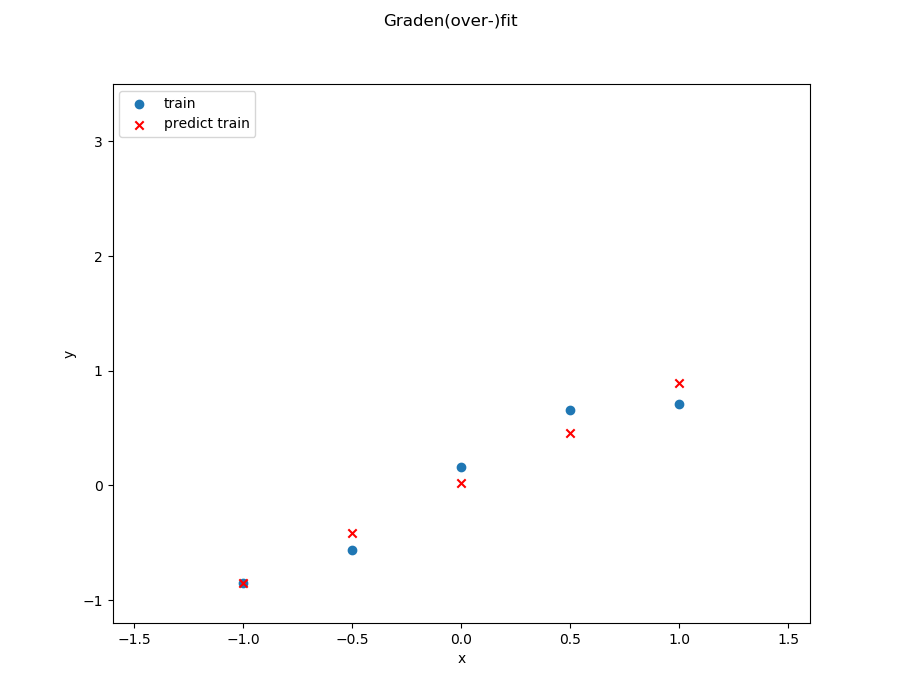

interactive(children=(IntSlider(value=1, description='Grad', min=1), IntSlider(value=5, description='Samples',…

In [13]:
fig_over, ax_over = plt.subplots(figsize=(9,7))
fig_over.suptitle('Graden(over-)fit')

@wdg.interact(poly_d=wdg.IntSlider(min=1, max=100, value=1, description='Grad'),
             num_samples=wdg.IntSlider(min=5, max=100, value=5, description='Samples'),
             test=wdg.Checkbox(description='test'))
def plot_graden_overfit(poly_d, num_samples, test):
    np.random.seed(1)
    ax_over.clear()
    x = np.linspace(-1,1,num_samples)
    x_grid = np.sort(np.random.uniform(-1.5, 1.5, 1000))
    y = x + np.random.normal(0, 0.2, num_samples)
    ax_over.scatter(x,y, label='train')
    ax_over.set_xlim([-1.6,1.6])
    ax_over.set_ylim([-1.2,3.5])
    X = np.array([x**d for d in range(1,poly_d+1)]).T
    reg = LinearRegression(fit_intercept=True).fit(X,y)
    ax_over.scatter(x, reg.predict(X), label='predict train', marker='x', color='r')
    ax_over.legend(loc=2)
    if test:
        X_grid = np.array([x_grid**d for d in range(1,poly_d+1)]).T
        ax_over.plot(x_grid, reg.predict(X_grid), color='r', linewidth=2, label='predict test')
    ax_over.set_xlabel('x')
    ax_over.set_ylabel('y')
    plt.show()

<IPython.core.display.Javascript object>


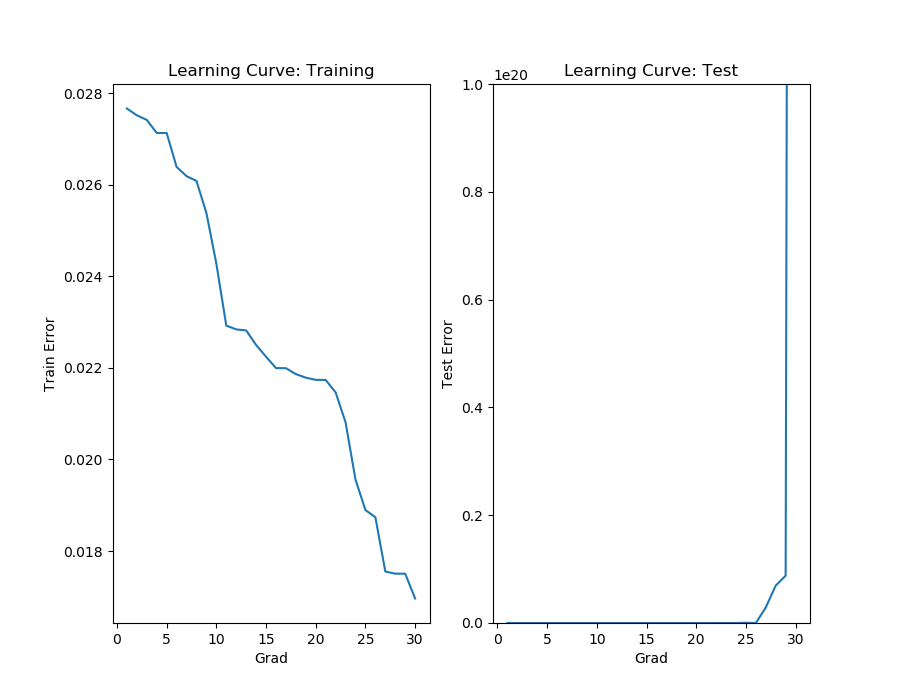

In [14]:
np.random.seed(1)
n_train = 80
n_test = 20
d_max = 30
x = np.linspace(-1,1, n_train)
x_grid = np.sort(np.random.uniform(-1.5, 1.5, n_test))
y_train = x + np.random.normal(0, 0.2, n_train)
y_test = x_grid + np.random.normal(0, 0.2, n_test)
y_pred_train = np.zeros((n_train, d_max))
y_pred_test = np.zeros((n_test, d_max))

for d in range(1, d_max+1):
    X = np.array([x**d for d in range(1,d+1)]).T
    X_grid = np.array([x_grid**d for d in range(1,d+1)]).T
    reg = LinearRegression(fit_intercept=True).fit(X,y_train)
    y_pred_train[:, d-1] = reg.predict(X)
    y_pred_test[:, d-1] = reg.predict(X_grid)

fig_trtest, ax_trtest = plt.subplots(nrows=1, ncols=2, figsize=(9,7))
ax_trtest[0].plot(range(1, d_max+1), ((y_train[:,np.newaxis] - y_pred_train)**2).mean(axis=0), label='train')
ax_trtest[1].plot(range(1, d_max+1), ((y_test[:,np.newaxis] - y_pred_test)**2).mean(axis=0), label='test')
ax_trtest[0].set_xlabel('Grad')
ax_trtest[0].set_ylabel('Train Error')
ax_trtest[1].set_xlabel('Grad')
ax_trtest[1].set_ylabel('Test Error')
#ax_trtest[0].set_ylim([0, 1])
ax_trtest[1].set_ylim([0, 1e20])
ax_trtest[0].set_title('Learning Curve: Training')
ax_trtest[1].set_title('Learning Curve: Test')
plt.show()

## Under- und Overfitting

In [15]:
n = 250
x = np.linspace(-20, 20, n)
np.random.seed(1)
e = np.random.normal(0, 0.1, n)
y_sine = np.sin(x) + e
X_sine = x[:,np.newaxis]
x_test = np.sort(np.random.uniform(-20, 20, 50))
X_test = x_test[:, np.newaxis]
y_test = np.sin(x_test) + np.random.normal(0, 0.1, 50)

lr_preds = {}
lr_tests = {}
d_max = 20
for d in range(1, d_max):
    poly = PolynomialFeatures(degree=d, include_bias=False) 
    phi = poly.fit_transform(X_sine)
    reg = LinearRegression(fit_intercept=False).fit(phi,y_sine)
    lr_preds[d] = reg.predict(phi)
    lr_tests[d] = reg.predict(poly.fit_transform(X_test))

<IPython.core.display.Javascript object>


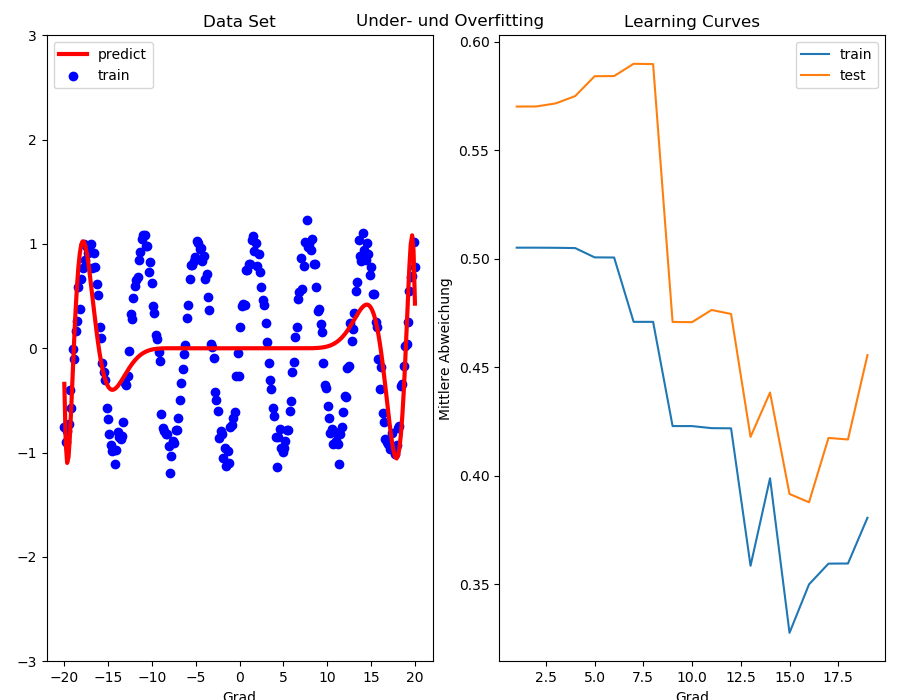

interactive(children=(IntSlider(value=4, description='Grad', max=19, min=1), Checkbox(value=False, description…

In [17]:
fig_sine, ax_sine = plt.subplots(ncols=2, nrows=1, figsize=(9,7))
fig_sine.suptitle('Under- und Overfitting')
ax_sine[1].plot(range(1, d_max), np.array([((y_sine-lr_preds[d])**2).mean() for d in range(1,d_max)]), label='train')
ax_sine[1].plot(range(1, d_max), np.array([((y_test-lr_tests[d])**2).mean() for d in range(1,d_max)]), label='test')
ax_sine[1].legend(loc='upper right')
ax_sine[1].set_title('Learning Curves')
fig_sine.tight_layout()

@wdg.interact()
def plot_sine(d=wdg.IntSlider(min=1, max=d_max-1, value=4, description='Grad'),
             loesung=wdg.Checkbox(description='Lösung')):
    ax_sine[0].cla()
    ax_sine[0].scatter(x, y_sine, color='b', label='train')
    ax_sine[0].plot(x, lr_preds[d], color='r', linewidth=3, label='predict')
    if loesung:
        ax_sine[0].plot(x, LinearRegression(fit_intercept=False).fit(np.sin(x[:,np.newaxis]),np.sin(x)).predict(np.sin(x[:,np.newaxis])), color='k', label='truth', linewidth=3)
    ax_sine[0].legend(loc=2)
    ax_sine[0].set_ylim([-3, 3])
    ax_sine[0].set_title('Data Set')
    ax_sine[0].set_xlabel('Grad')
    ax_sine[1].set_xlabel('Grad')
    ax_sine[1].set_ylabel('Mittlere Abweichung')
    plt.show()

# Quadratische Gleichungen
Wir lösen die Gleichung:
$$ x^2 + px + q = 0$$


In [ ]:
fig_disc = plt.figure()
ax_disc = fig_disc.add_subplot(111, projection='3d')
fig_disc.suptitle('Diskriminante')

x_disc = np.linspace(-5,5 , 50)
y_disc = np.linspace(-10, 10, 50)
x_disc_, y_disc_ = np.meshgrid(x_disc, y_disc)
d = np.array([[(p/2)**2 - q for q in y_disc] for p in x_disc])
d_ = d.reshape(x_disc_.shape)

#ax_disc.plot_surface(x_disc_, y_disc_, 0*d_, alpha=0.5)
ax_disc.plot_surface(x_disc_, y_disc_, d_)
ax_disc.set_xlabel('p')
ax_disc.set_ylabel('q')
ax_disc.set_zlabel('D')

In [ ]:
fig_loes = plt.figure()
ax_loes = fig_loes.add_subplot(111, projection='3d')
fig_loes.suptitle('Lösung(en)')

loes1 = np.array([[ -p/2 + np.sqrt((p/2)**2 - q) if (p/2)**2 - q >=0 else np.nan for q in y_disc] for p in x_disc])
loes2 = np.array([[ -p/2 - np.sqrt((p/2)**2 - q) if (p/2)**2 - q >=0 else np.nan for q in y_disc] for p in x_disc])
loes1_ = d.reshape(x_disc_.shape)
loes2_ = d.reshape(x_disc_.shape)

ax_loes.plot_surface(x_disc_, y_disc_, loes1)
ax_loes.plot_surface(x_disc_, y_disc_, loes2)
ax_loes.set_xlabel('$p$')
ax_loes.set_ylabel('$q$')
ax_loes.set_zlabel('$x_{1/2}$')
plt.show()